# This is Titanic Dataset in which we are predicting the survival of the passenger using Logistic Regression

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# 2) Loading of dataset into Pandas DataFrame

In [2]:
titanic_train = pd.read_csv('train.csv', index_col='Name')
titanic_test = pd.read_csv('test.csv')
titanic = pd.read_csv('gender_submission.csv')
train_df = pd.DataFrame(titanic_train)
#print(train_df.head())
test_df = pd.DataFrame(titanic_test)
test_df.head()
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# 3) Preprocessing of Training data

In [3]:
des = train_df.isnull()
des.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,714,891,891,891,891,687,889


In [4]:
# To drop NaN value from a particular place using imputation
age = train_df["Age"]
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.00,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.00,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.00,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Calculating mean of the age
age_mean = age.mean()
age_mean

29.69911764705882

In [6]:
#With the mean, let's fill the nulls using fillna():
age_mean = int(age_mean)
age.fillna(age_mean, inplace=True)
age.describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop(['Cabin', 'Embarked', 'SibSp', 'Ticket', 'Sex'], axis = 1, inplace=True)
#train_df.head()


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


In [10]:
train_df.isnull()
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Parch          0
Fare           0
dtype: int64

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Age,Parch,Fare
Name,,,,,,
"Braund, Mr. Owen Harris",1,0,3,22.0,0,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,0,71.2833
"Heikkinen, Miss. Laina",3,1,3,26.0,0,7.9250
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,35.0,0,53.1000
"Allen, Mr. William Henry",5,0,3,35.0,0,8.0500


# 4) Test Data Preprocessing

In [12]:
titanic_test = pd.read_csv('test.csv', index_col='Name')
test_df = pd.DataFrame(titanic_test)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
"Spector, Mr. Woolf",1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
"Oliva y Ocana, Dona. Fermina",1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
"Saether, Mr. Simon Sivertsen",1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [13]:
#Encoding Categorical Data. column 4 is a categorical data so we have to convert it into numeric data
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder=LabelEncoder()
# Sex_ind = train_df[['Sex']].values
# #Sex_ind
# Sex_ind = labelencoder.fit_transform(Sex_ind)  #converts categorical val. into 0s & 1s
# print(Sex_ind) #here male = 1 n female=0
# #OneHotEncoder takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns.
# #The numbers are replaced by 1s and 0s, depending on which column has what value.
# onehotencoder=OneHotEncoder() 
# train_df=onehotencoder.fit_transform(train_df).toarray()
# train_df

In [14]:
desc = test_df.isnull()
desc.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418,418,418,418,418,418,418,418,418,418
unique,1,1,1,2,1,1,1,2,2,1
top,False,False,False,False,False,False,False,False,True,False
freq,418,418,418,332,418,418,418,417,327,418


In [15]:
# To drop NaN value from a particular place using imputation
age = test_df["Age"]
test_df.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Spector, Mr. Woolf",1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
"Oliva y Ocana, Dona. Fermina",1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
"Saether, Mr. Simon Sivertsen",1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
"Ware, Mr. Frederick",1308,3,male,NaN,0,0,359309,8.0500,NaN,S
"Peter, Master. Michael J",1309,3,male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
#Calculating mean of the age
age_mean = age.mean()
age_mean

30.272590361445783

In [17]:
#With the mean, let's fill the nulls using fillna():
age_mean = int(age_mean)
age.fillna(age_mean, inplace=True)
age.describe()

count    418.000000
mean      30.216507
std       12.635016
min        0.170000
25%       23.000000
50%       30.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [18]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
"Kelly, Mr. James",892,3,male,34.5,0,0,330911,7.8292,NaN,Q
"Wilkes, Mrs. James (Ellen Needs)",893,3,female,47.0,1,0,363272,7.0000,NaN,S
"Myles, Mr. Thomas Francis",894,2,male,62.0,0,0,240276,9.6875,NaN,Q
"Wirz, Mr. Albert",895,3,male,27.0,0,0,315154,8.6625,NaN,S
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test_df.drop(['Cabin', 'Embarked', 'SibSp', 'Ticket', 'Sex'], axis = 1, inplace=True)
test_df.head()


,PassengerId,Pclass,Age,Parch,Fare
Name,,,,,
"Kelly, Mr. James",892,3,34.5,0,7.8292
"Wilkes, Mrs. James (Ellen Needs)",893,3,47.0,0,7.0000
"Myles, Mr. Thomas Francis",894,2,62.0,0,9.6875
"Wirz, Mr. Albert",895,3,27.0,0,8.6625
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,22.0,1,12.2875


In [20]:
test_df.describe()

,PassengerId,Pclass,Age,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.216507,0.392344,35.627188
std,120.810458,0.841838,12.635016,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,9.000000,512.329200


In [21]:
test_df.isnull()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Parch          0
Fare           1
dtype: int64

In [22]:
fare = test_df['Fare']
fare_mean = fare.mean()
#fare_mean
fare_mean = int(fare_mean)
fare.fillna(fare_mean, inplace=True)
fare.describe()

count    418.000000
mean      35.625688
std       55.840509
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [23]:
test_df.isnull()
test_df.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Parch          0
Fare           0
dtype: int64

In [24]:
test_df.head()

,PassengerId,Pclass,Age,Parch,Fare
Name,,,,,
"Kelly, Mr. James",892,3,34.5,0,7.8292
"Wilkes, Mrs. James (Ellen Needs)",893,3,47.0,0,7.0000
"Myles, Mr. Thomas Francis",894,2,62.0,0,9.6875
"Wirz, Mr. Albert",895,3,27.0,0,8.6625
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,22.0,1,12.2875


# 5) Data Visualization using Seaborn

In [25]:
import seaborn as sns

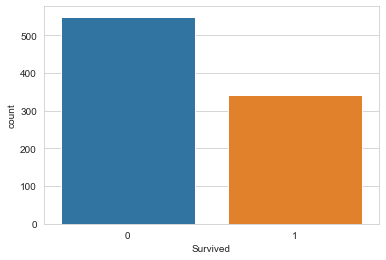

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df)

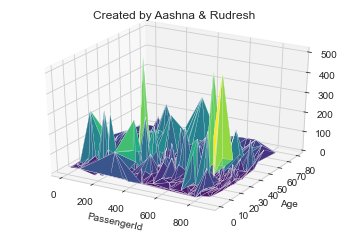

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(train_df['PassengerId'], train_df['Age'], train_df['Fare'], cmap=plt.cm.viridis, linewidth=0.2)
plt.title('Created by Aashna & Rudresh')
plt.xlabel('PassengerId')
plt.ylabel('Age')

plt.show()


# 6) Spliting data into input and label/output/target

In [28]:
x = train_df.drop('Survived', axis= 1)
y = train_df['Survived'].values
#x
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# 7) Model Defining using Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_LR=LogisticRegression(random_state=0)
classifier_LR.fit(x, y)

LogisticRegression(random_state=0)

# 8) Final Prediction of Model

In [30]:
survive = classifier_LR.predict(test_df)


In [31]:
survive

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [32]:
test_df['Survived'] = survive
test_df

,PassengerId,Pclass,Age,Parch,Fare,Survived
Name,,,,,,
"Kelly, Mr. James",892,3,34.5,0,7.8292,0
"Wilkes, Mrs. James (Ellen Needs)",893,3,47.0,0,7.0000,0
"Myles, Mr. Thomas Francis",894,2,62.0,0,9.6875,0
"Wirz, Mr. Albert",895,3,27.0,0,8.6625,0
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,22.0,1,12.2875,0
...,...,...,...,...,...,...
"Spector, Mr. Woolf",1305,3,30.0,0,8.0500,0
"Oliva y Ocana, Dona. Fermina",1306,1,39.0,0,108.9000,1
"Saether, Mr. Simon Sivertsen",1307,3,38.5,0,7.2500,0


In [33]:
test_df.head(20)

,PassengerId,Pclass,Age,Parch,Fare,Survived
Name,,,,,,
"Kelly, Mr. James",892,3,34.5,0,7.8292,0
"Wilkes, Mrs. James (Ellen Needs)",893,3,47.0,0,7.0000,0
"Myles, Mr. Thomas Francis",894,2,62.0,0,9.6875,0
"Wirz, Mr. Albert",895,3,27.0,0,8.6625,0
"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,3,22.0,1,12.2875,0
"Svensson, Mr. Johan Cervin",897,3,14.0,0,9.2250,0
"Connolly, Miss. Kate",898,3,30.0,0,7.6292,0
"Caldwell, Mr. Albert Francis",899,2,26.0,1,29.0000,0
"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",900,3,18.0,0,7.2292,0


In [34]:
import os

In [35]:
%pwd

'D:\\Machine Learning\\My_Work\\titanic'

In [36]:
test_df.to_csv('titanic_test.csv')